In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

C:\Users\Renz\AppData\Local\Temp\ipykernel_21132\1857829374.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
taiwan_real_estate = pd.read_csv('C:/Users/Renz/Documents/GitHub/dataScience/Statistics/taiwan_real_estate2.csv')

In [4]:
# Creating price vs. number of convenience store model
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fitting Taiwanese dollar price vs. number of nearby convenience store model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


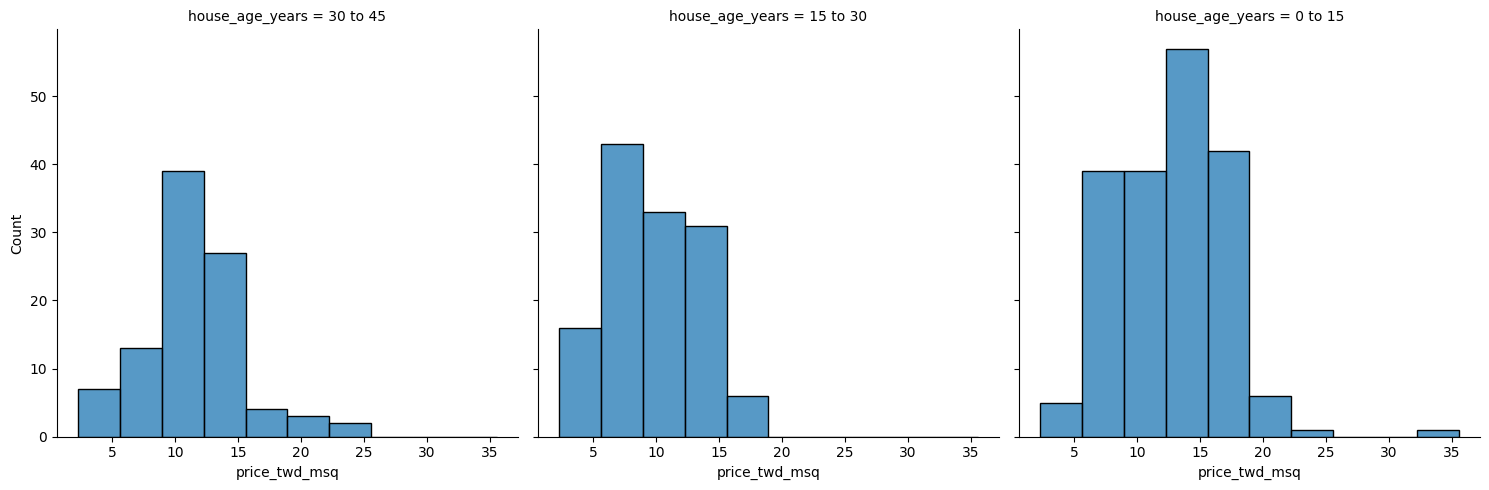

In [5]:
# Visualising price_twd_msq split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

plt.show()

In [6]:
# Calculating the mean of price_twd_msq by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [7]:
# Creating and fitting price vs. house age model
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [8]:
# Creating explanatory data
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

In [9]:
# Using mdl_price_vs_conv to predict explanatory_data
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

In [11]:
# Creating prediction data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq
)

print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


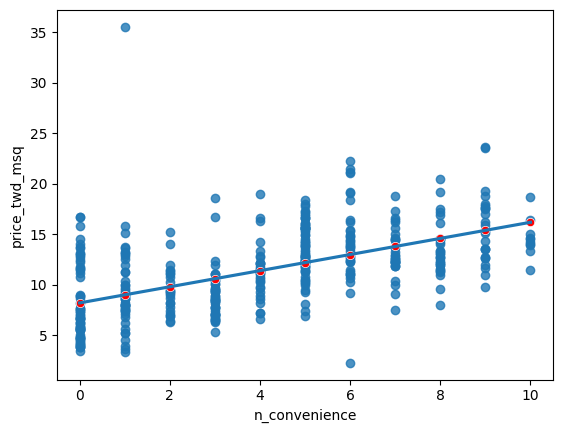

In [12]:
# Visualising price prediction in terms of number of convenience stores
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

sns.scatterplot(
            x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='red')

plt.show()